# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
17

17

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We will also import other relevant functions 

In [5]:
from random import shuffle, seed
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, FunctionTransformer
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import LeavePOut, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_transformer, ColumnTransformer, TransformedTargetRegressor
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import time

from IPython.display import Markdown, display

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The summary above confirms that there are no missing values in the dataset (total entries = 41,188, all columns are shown to have 41,188 non-null values).  

The target variable 'y' is a binary classifier, so will need to be encoded from it's current 'object' datatype to numbers.
The other categorial variables are all objects, and will also need encoding.

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Answer: The business object is to determine which attributes of a customer and the marketing campagin directed towards this customer will result in the customer subscribing to a term deposit with the bank or not, after being contacted by the campaign.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

First, we will separate out columns 1-7 from the dataset, as requested:

In [7]:
#First, create a copy of the original dataset to work with
df_bank = df.copy()

In [8]:
#Split out the first 7 columns, as requested:
df_bank = df_bank[['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'y']]

In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        41188 non-null  int64 
 1   job        41188 non-null  object
 2   marital    41188 non-null  object
 3   education  41188 non-null  object
 4   default    41188 non-null  object
 5   housing    41188 non-null  object
 6   loan       41188 non-null  object
 7   y          41188 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.5+ MB


### Build a Column Transformer

Categories with inherent numerical order will be coded with an Ordinal Encoder.
- Education

Categories with no inherent numerical order will be coded with a One Hot Encoder.
- Job
- Marital
- Default
- Housing
- Loan 

In [10]:
#Define categories to be ordinally encoded:
oe_columns = ['education']
#Define numerical order for the unique values within these categories:
category_orders = [['illiterate','basic.4y','basic.6y','basic.9y','unknown','high.school','professional.course','university.degree']]

#Define categories to be one hot encoded:
ohe_columns = ['job','marital','default','housing','loan']

#Define remaining numeric columns:
numeric_columns = ['age']

#Create column transformer:
col_transformer = make_column_transformer((OneHotEncoder(drop='first'), ohe_columns),
                                          (OrdinalEncoder(categories = category_orders), oe_columns),
                                          (StandardScaler(), numeric_columns),
                                          remainder = 'passthrough')


We will separate out the target variable 'y' and encode it separately before trainign our models.  The x variables will be transformed and encoded in the model pipelines.

In [11]:
#Separate out X variables
X = df_bank.drop(['y'], axis = 1)

In [12]:
# One-hot encode the 'y' column and separate it out
y = pd.get_dummies(df_bank['y'], columns=['y'], drop_first=True).astype(int)

# Sanity check
y.head()

,yes
0,0
1,0
2,0
3,0
4,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

Because this is a binary classification model, we will look at the accuracy of the model predicting the majority class for all datapoints.

In our case, where 0 = no and 1 = yes, to a customer subscribing to a term deposit, we can define our baseline performance as roughly 89% for both the test and train datasets.

This means that if the model classified every single datapoint as the majority class ('No'), then it would have a 88.5% test acuracy.  Our aim is to improve model performance beyond this, but we also want to make sure we maximize the correct performance matrix.  See below:

In [14]:
y_test.value_counts(normalize = True)

yes
0      0.885112
1      0.114888
Name: proportion, dtype: float64

In [15]:
y_train.value_counts(normalize = True)

yes
0      0.88809
1      0.11191
Name: proportion, dtype: float64

Note that because the dataset is extremely imbalanced (~89/11% split between no and yes answers), we will want to pick the best performing model based on either precision, recall or F1 score.

In this case, we want to correctly identify as many potential customers that will say yes to opening a deposit account.  In this binary dataset, the Positive classifier 1 = yes, to opening an account, while the Negative classifier 0 = no.  This means that we value identifying a True Positives, and want to avoid False Negatives (this would mean a potential deposit customer was classified as a 'No', and the bank would not reach out to a successful candidate).  In this case we want to **maximize Recall**, which is the measure of:

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

Recall will be high when we identify as many True Positives as possible, and minimize the number of False Negatives.  In other words, it will be high when we correctly classify as many 'yes' customers as possible, and minimize incorrectly classifying them as 'no'.

If this comes at the expense of low precision, meaning we accidentally classify 'no' customers as 'yes', and reach out to them, that's an acceptable risk as it may indeed result in a 'yes', or otherwise the customer can simply decline the offer.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
#Instantiate a Logistic Regression model pipeline, using the column transform to encode values as specified above:
lr_pipe = Pipeline([('transformer',col_transformer),
                    ('lr', LogisticRegression())])

#Fit the model to the training data
lr_start_time = time.time()
lr_model = lr_pipe.fit(X_train, y_train)
lr_duration = time.time() - lr_start_time


C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
#Predict on train and test data
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
lr_test_accuracy = accuracy_score(y_test, y_test_pred)
lr_train_accuracy = accuracy_score(y_train, y_train_pred)
lr_test_recall = recall_score(y_test, y_test_pred)
lr_train_recall = recall_score(y_train, y_train_pred)
lr_test_precision = precision_score(y_test, y_test_pred)
lr_train_precision = precision_score(y_train, y_train_pred)

display(Markdown(f'The accuracy of the model is {lr_test_accuracy*100:.2f}%'))

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The accuracy of the model is 88.51%

Below we will assign a dataframe to collect results of all models.

In [19]:
results_df = pd.DataFrame(columns = ['Model', 'Train Duration', 'Train Accuracy', 'Test Accuracy', 'Train Recall', 'Test Recall', 'Train Precision', 'Test Precision'])
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision


We append the first set of results from the Logistic Regression Model

In [20]:
lr_report = {
    'Model': 'Logistic Regression',
    'Train Duration': lr_duration,
    'Train Accuracy': lr_train_accuracy,
    'Test Accuracy': lr_test_accuracy,
    'Train Recall': lr_train_recall,
    'Test Recall': lr_test_recall,
    'Train Precision': lr_train_precision,
    'Test Precision': lr_test_precision}


#results_df = results_df.append(lr_report, ignore_index=True).round(3)
lr_report = pd.DataFrame([lr_report])
results_df = pd.concat([results_df, lr_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.0,0.0,0.0,0.0


The recall and precision scores are 0.  We can confirm this by looking at the confusion matrix plot below, which shows the model predicted that every customer as a 'no'.

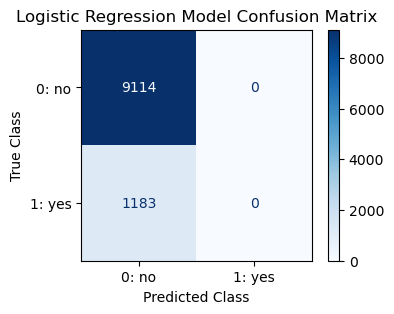

In [21]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, lr_model.predict(X_test))

#Extract false positives
lr_FP = conf_matrix[0][1]
#Extract false negatives
lr_FN = conf_matrix[1][0]

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 3))  
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0: no', '1: yes']).plot(ax=ax, values_format='d', cmap='Blues')
plt.title('Logistic Regression Model Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.grid(False)
plt.show()

## Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Our dataframe was defined in the section above.  It is below:

In [22]:
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.0,0.0,0.0,0.0


### i) KNN

In [23]:
#Instantiate a Linear Regression model pipeline, using the column transform to encode values as specified above:
knn_pipe = Pipeline([('transformer', col_transformer),
                    ('knn', KNeighborsClassifier())])

#Fit the model to the training data
knn_start_time = time.time()
knn_model = knn_pipe.fit(X_train, y_train)
knn_duration = time.time() - knn_start_time

#Predict on train and test data
y_train_pred = knn_pipe.predict(X_train)
y_test_pred = knn_pipe.predict(X_test)

#Calculate metrics
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_test_recall = recall_score(y_test, y_test_pred)
knn_train_recall = recall_score(y_train, y_train_pred)
knn_test_precision = precision_score(y_test, y_test_pred)
knn_train_precision = precision_score(y_train, y_train_pred)

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [24]:
#Append metrics to summary table
knn_report = {
    'Model': 'KNN',
    'Train Duration': knn_duration,
    'Train Accuracy': knn_train_accuracy,
    'Test Accuracy': knn_test_accuracy,
    'Train Recall': knn_train_recall,
    'Test Recall': knn_test_recall,
    'Train Precision': knn_train_precision,
    'Test Precision': knn_test_precision}


knn_report = pd.DataFrame([knn_report])
results_df = pd.concat([results_df, knn_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292


In [25]:
#Instantiate a Linear Regression model pipeline, using the column transform to encode values as specified above:
dt_pipe = Pipeline([('transformer', col_transformer),
                    ('dt', DecisionTreeClassifier())])

#Fit the model to the training data
dt_start_time = time.time()
dt_model = dt_pipe.fit(X_train, y_train)
dt_duration = time.time() - dt_start_time

#Predict on train and test data
y_train_pred = dt_pipe.predict(X_train)
y_test_pred = dt_pipe.predict(X_test)

#Calculate metrics
dt_test_accuracy = accuracy_score(y_test, y_test_pred)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)
dt_test_recall = recall_score(y_test, y_test_pred)
dt_train_recall = recall_score(y_train, y_train_pred)
dt_test_precision = precision_score(y_test, y_test_pred)
dt_train_precision = precision_score(y_train, y_train_pred)

In [26]:
#Append metrics to summary table
dt_report = {
    'Model': 'Decision Tree',
    'Train Duration': dt_duration,
    'Train Accuracy': dt_train_accuracy,
    'Test Accuracy': dt_test_accuracy,
    'Train Recall': dt_train_recall,
    'Test Recall': dt_test_recall,
    'Train Precision': dt_train_precision,
    'Test Precision': dt_test_precision}


dt_report = pd.DataFrame([dt_report])
results_df = pd.concat([results_df, dt_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283


In [27]:
#Instantiate a Linear Regression model pipeline, using the column transform to encode values as specified above:
svc_pipe = Pipeline([('transformer', col_transformer),
                    ('svc', SVC())])

#Fit the model to the training data
svc_start_time = time.time()
svc_model = svc_pipe.fit(X_train, y_train)
svc_duration = time.time() - svc_start_time

#Predict on train and test data
y_train_pred = svc_pipe.predict(X_train)
y_test_pred = svc_pipe.predict(X_test)

#Calculate metrics
svc_test_accuracy = accuracy_score(y_test, y_test_pred)
svc_train_accuracy = accuracy_score(y_train, y_train_pred)
svc_test_recall = recall_score(y_test, y_test_pred)
svc_train_recall = recall_score(y_train, y_train_pred)
svc_test_precision = precision_score(y_test, y_test_pred)
svc_train_precision = precision_score(y_train, y_train_pred)

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
#Append metrics to summary table
svc_report = {
    'Model': 'SVC',
    'Train Duration': svc_duration,
    'Train Accuracy': svc_train_accuracy,
    'Test Accuracy': svc_test_accuracy,
    'Train Recall': svc_train_recall,
    'Test Recall': svc_test_recall,
    'Train Precision': svc_train_precision,
    'Test Precision': svc_test_precision}


svc_report = pd.DataFrame([svc_report])
results_df = pd.concat([results_df, svc_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283
3,SVC,12.464,0.888,0.885,0.000,0.000,0.000,0.000


As we can see from our results table, none of the test accuracies improved past our baseline of 88.5% or 0.885.  

We also see that the recall scores are extremely low, with the Decision Tree performing the best at 0.105.  The confusion plot below shows us that the model has correctly identified 124 customers as agreeing 'yes' to a term deposit, but failed to identify the remaining 1059 'yes' customers.  

These models essentially perform no better than random guessing.

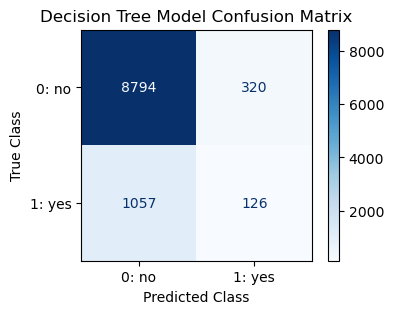

In [29]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, dt_model.predict(X_test))

#Extract false positives
dt_FP = conf_matrix[0][1]
#Extract false negatives
dt_FN = conf_matrix[1][0]

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 3))  
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0: no', '1: yes']).plot(ax=ax, values_format='d', cmap='Blues')
plt.title('Decision Tree Model Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.grid(False)
plt.show()

## Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### i) Clean Numerical Features/Categories

First we will explore the numerical features to see which ones we want to remove from our analysis.

In [30]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])
custom_percentiles = [0.02, 0.1, 0.25, 0.5, 0.75, 0.99]
df_numerical.describe(percentiles = custom_percentiles)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
2%,24.00000,17.000000,1.000000,6.000000,0.000000,-3.400000,92.379000,-47.100000,0.714000,4991.600000
10%,28.00000,59.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,1.046000,5076.200000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
99%,71.00000,1271.130000,14.000000,999.000000,2.000000,1.400000,94.465000,-26.900000,4.968000,5228.100000


C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppData\Local\Temp\ipykernel_9616\1430587989.py:26: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\mpaci\AppDa

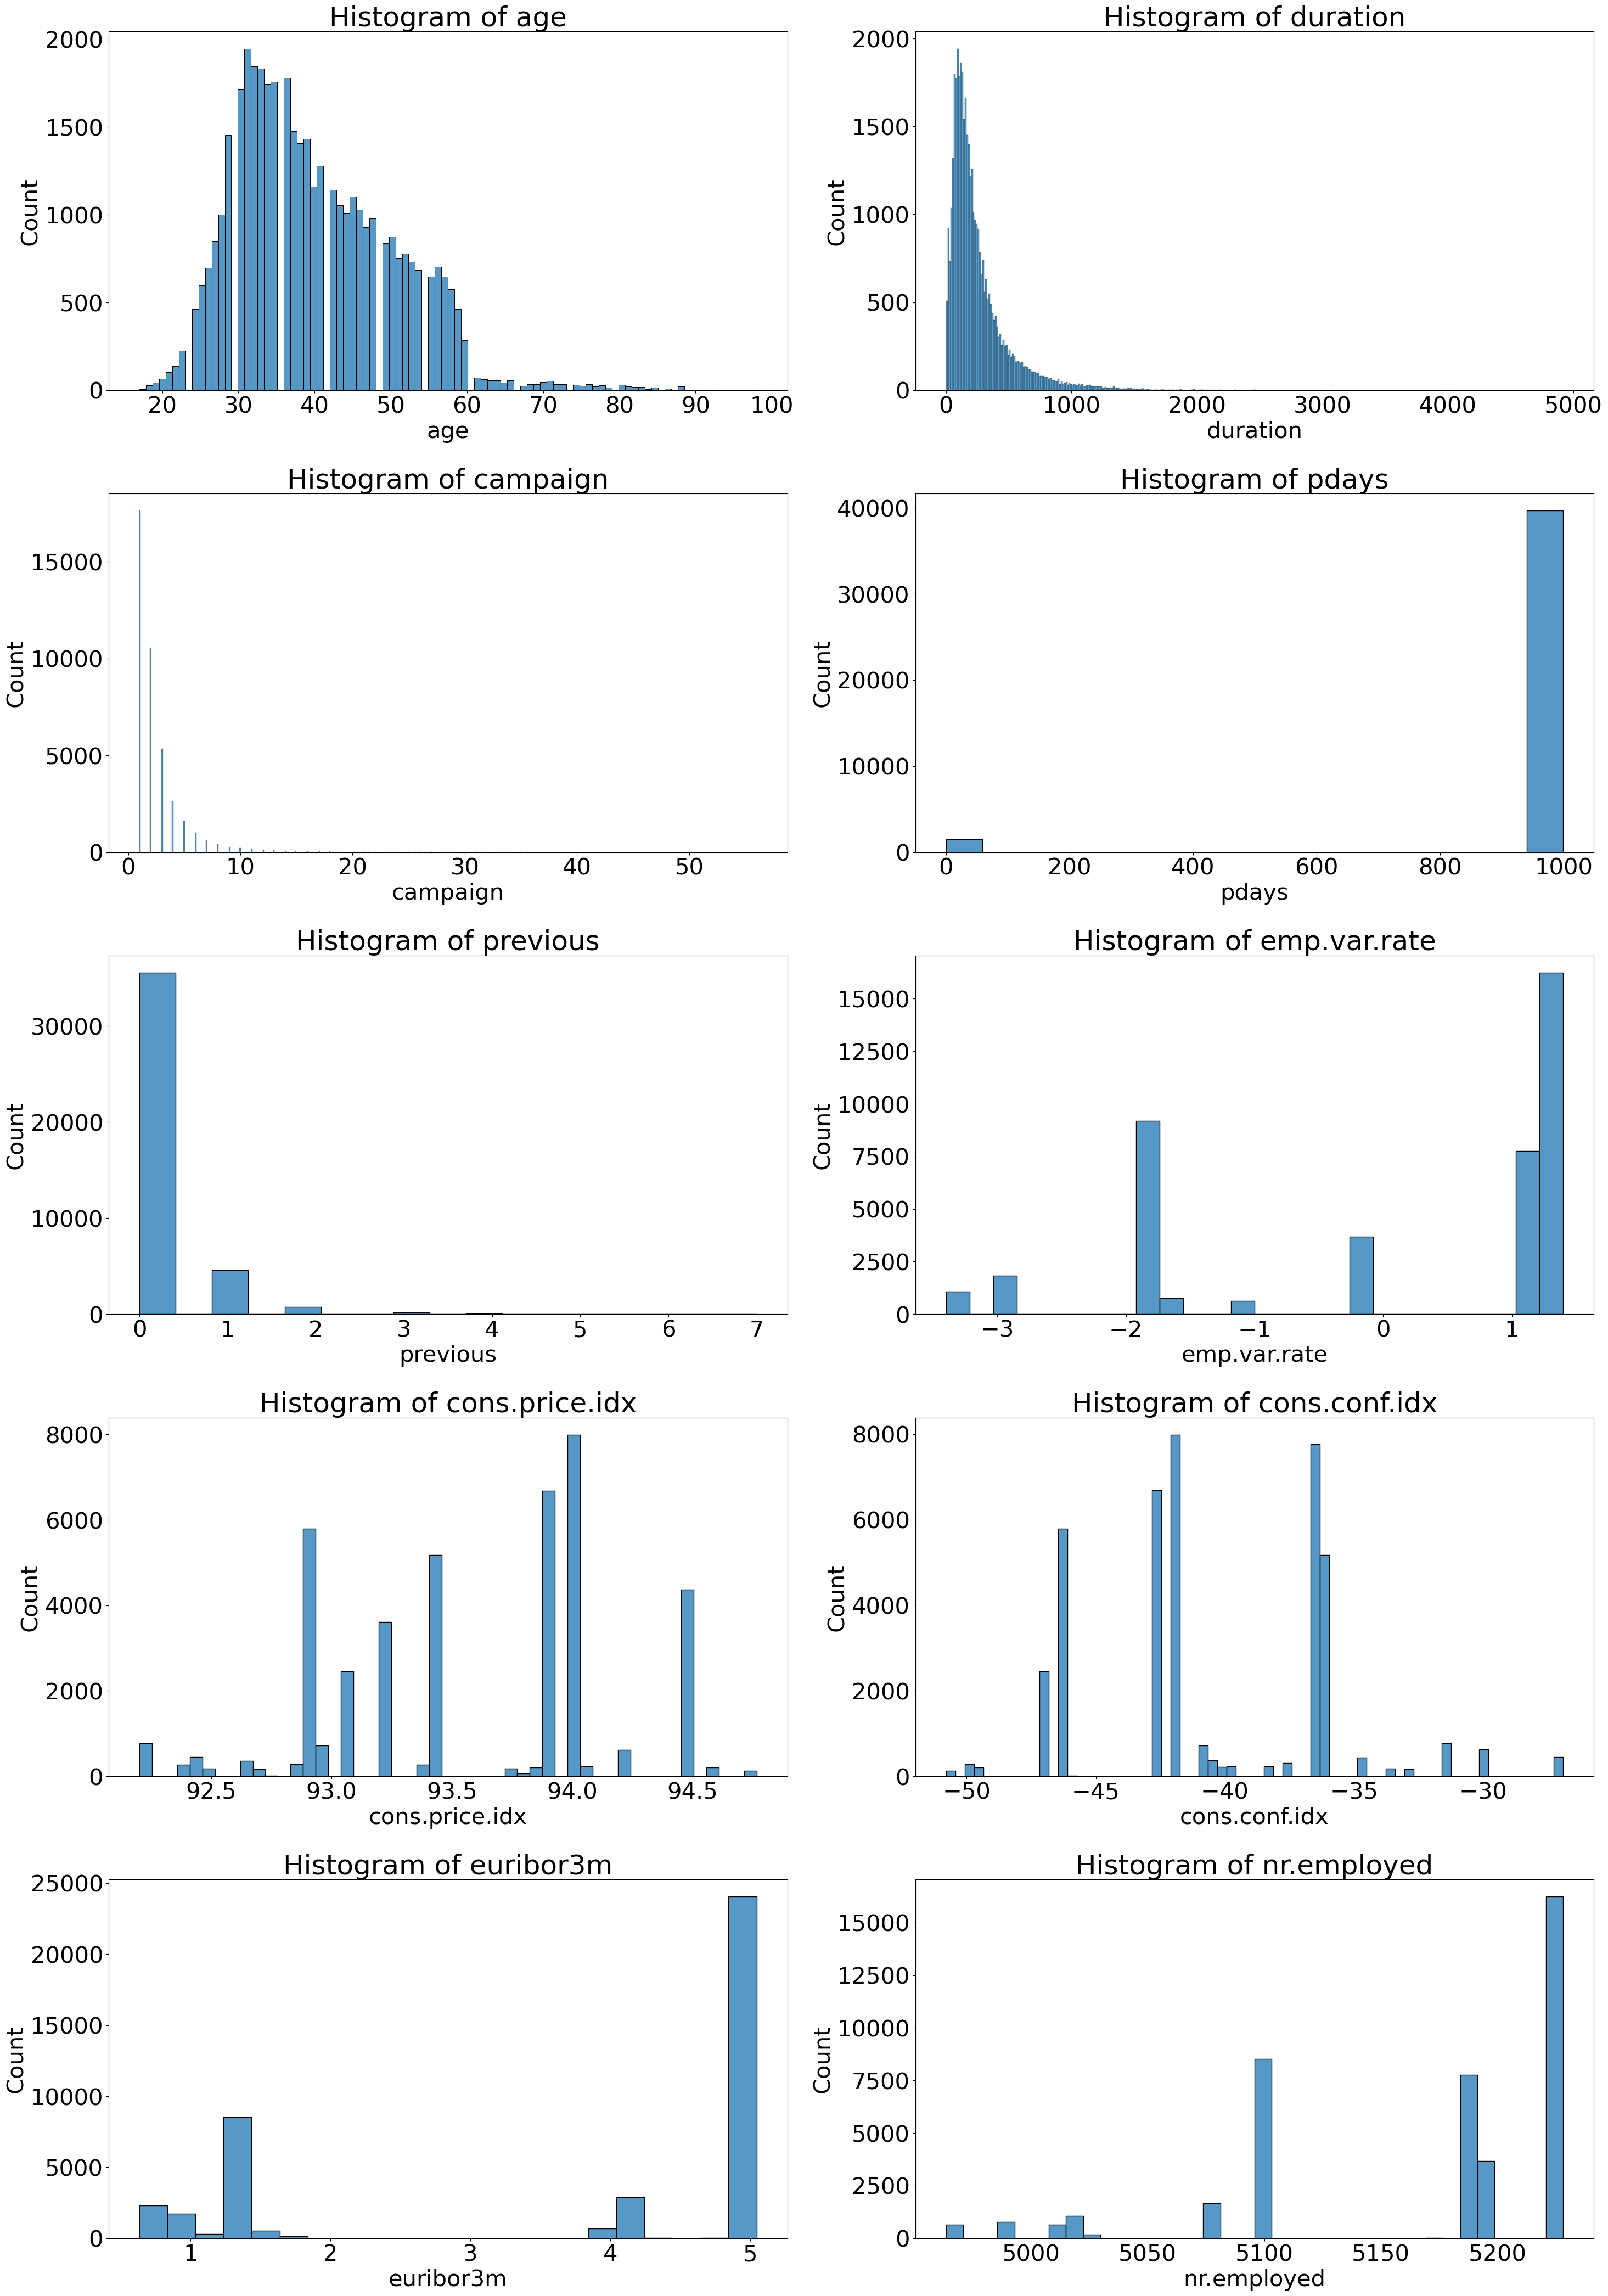

In [31]:
# Define numeric column names
num_columns = [
    'age',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

# Set the global font size
plt.rcParams.update({'font.size': 30})

# Set up the matplotlib figure
plt.figure(figsize=(30, 50))

# Loop through each column and create a subplot for each histogram
for i, column in enumerate(num_columns, 1):
    plt.subplot(6, 2, i) 
    sns.histplot(df_numerical[column], kde=False)
    plt.title(f'Histogram of {column}')
    plt.tight_layout()

plt.show()

From the describe summary, the two observations that stand out are:

1. Outliers:
- Duration and Campaign and 'Previous' all have max values that appear to be significant outliers (based on the mean, std and 75% values).  In the notes provided with the data, it also mentions that duration should be dropped for predictive analysis.  
- We will drop Duration as recommended by the dataset
- We will keep Campaign and Previous, but trim excessive outliers by removing values above the 99 percentile values.

2. Noisy Distributions:
- As we can see from the histograms, many of the features have very sparse and non-normally distributed data.  We will remove these from our analysis for now, as this could cause issues with our algorithms. 
- We will drop 
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'

3. Encode binary categories
- We can see from the histogram that the pdays value is mostly split between 999 and 0.   Below we show the % that each value represents in the pday category.  
- We will convert this to a binary category, where all values < 999 are considered 1 category, and 999 is the other category.


In [32]:
# Count the frequency of each unique value in pdays and convert to percentage
value_counts = df['pdays'].value_counts(normalize=True).round(3) * 100
    
# Create a DataFrame with unique values and their corresponding percentages
unique_values_with_percentage = pd.DataFrame({
        'Category': value_counts.index,
        '% of Category': value_counts.values
    })
    
print(f"pdays:\n{unique_values_with_percentage}\n")

pdays:
    Category  % of Category
0        999           96.3
1          3            1.1
2          6            1.0
3          4            0.3
4          9            0.2
5          2            0.1
6          7            0.1
7         12            0.1
8         10            0.1
9          5            0.1
10        13            0.1
11        11            0.1
12         1            0.1
13        15            0.1
14        14            0.0
15         8            0.0
16         0            0.0
17        16            0.0
18        17            0.0
19        18            0.0
20        22            0.0
21        19            0.0
22        21            0.0
23        25            0.0
24        26            0.0
25        27            0.0
26        20            0.0



#### Step 1: Remove Outliers

Before making any of the changes, we will copy a new dataframe

In [33]:
df_updated = df.copy()

As mentioned above, 
- We will drop Duration as recommended by the dataset
- We will keep Campaign and Previous, but trim excessive outliers by removing values above the 99 percentile values.

In [34]:
df_updated = df_updated.drop(['duration'], axis = 1)

In [35]:
# Calculate percentile values for 'campaign'
campaign_upper_bound = df['campaign'].quantile(0.99)

# Calculate percentile values for 'previous'
previous_upper_bound = df['previous'].quantile(0.99)

# Filter the DataFrame based on these percentile values
df_updated = df_updated[
    (df_updated['campaign'] <= campaign_upper_bound) & 
    (df_updated['previous'] <= previous_upper_bound) 
    ]

#### Step 2: Remove Noisy Distributions

As mentioned above,
- We will drop 
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'

In [36]:
df_updated = df_updated.drop(['emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'], axis = 1)

#### Step 3: Encode binary category (pday)

As mentioned above,
- We will convert this to an encoded binary category, where all values < 999 are considered "0", and 999 is considered "1".


In [37]:
#Create new column for encoded pdays value, with initial value 0 (values <999)
df_updated['pdays_enc'] = 0

#Set value to 1 where pdays = 000
df_updated.loc[df_updated['pdays'] == 999, 'pdays_enc'] = 1

#drop the original pdays column
df_updated = df_updated.drop(['pdays'], axis = 1)

### ii) Clean Categorical Features

It's noted that the prompt asks whether or not gender data should be included.
In this case, the dataset did not include gender, and reading through the article that accompanied the dataset (link [here](CRISP-DM-BANK.pdf)), we note that this metric was originally included in the data gathering activity, however it was removed in a subsequent iteration of CRISP-DM process, because the rate of success (customer opening a term deposit) was the same independent of the applicant's gender.  


To analyse the remaining object data better, we will print out the unique values per category:

In [38]:
#Identify Object Columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

# Loop through each object column and print unique values with percentages
for column in object_columns:
    # Count the frequency of each unique value and convert to percentage
    value_counts = df[column].value_counts(normalize=True).round(3) * 100
    
    # Create a DataFrame with unique values and their corresponding percentages
    unique_values_with_percentage = pd.DataFrame({
        'Category': value_counts.index,
        '% of Category': value_counts.values
    })
    
    print(f"{column}:\n{unique_values_with_percentage}\n")

job:
         Category  % of Category
0          admin.           25.3
1     blue-collar           22.5
2      technician           16.4
3        services            9.6
4      management            7.1
5         retired            4.2
6    entrepreneur            3.5
7   self-employed            3.5
8       housemaid            2.6
9      unemployed            2.5
10        student            2.1
11        unknown            0.8

marital:
   Category  % of Category
0   married           60.5
1    single           28.1
2  divorced           11.2
3   unknown            0.2

education:
              Category  % of Category
0    university.degree           29.5
1          high.school           23.1
2             basic.9y           14.7
3  professional.course           12.7
4             basic.4y           10.1
5             basic.6y            5.6
6              unknown            4.2
7           illiterate            0.0

default:
  Category  % of Category
0       no           79.1
1  un

From a quick scan of the composition of each of the object features above, we can see that the 'default' feature is binary (y/n), with 0% of answers being yes, and 20% being unknown.  

Given that we can't assume the unknown category is completely yes or no, and is likely a mixture of both, I will completely remove this feature from analysis, as it will be difficult to interpret.  

In [39]:
df_updated = df_updated.drop(['default'], axis = 1)

We will keep all other object columns for encoding.  

### iii) Create Column Transformer

Below we review the remaining categories in our clean dataframe, and create a column transformer based on our observations above.

In [40]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40472 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          40472 non-null  int64 
 1   job          40472 non-null  object
 2   marital      40472 non-null  object
 3   education    40472 non-null  object
 4   housing      40472 non-null  object
 5   loan         40472 non-null  object
 6   contact      40472 non-null  object
 7   month        40472 non-null  object
 8   day_of_week  40472 non-null  object
 9   campaign     40472 non-null  int64 
 10  previous     40472 non-null  int64 
 11  poutcome     40472 non-null  object
 12  y            40472 non-null  object
 13  pdays_enc    40472 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 4.6+ MB


In [41]:
#Define categories to be ordinally encoded:
oe_columns = ['education']
#Define numerical order for the unique values within these categories:
category_orders = [['illiterate','basic.4y','basic.6y','basic.9y','unknown','high.school','professional.course','university.degree']]

#Define categories to be one hot encoded:
ohe_columns = ['job','marital','housing','loan', 'contact', 'month', 'day_of_week', 'poutcome']

#Define remaining numeric columns:
numeric_columns = ['age', 'campaign', 'previous']
#we leave the 'pdays_enc column out since it has already been manually encoded'

#Create column transformer:
col_transformer = make_column_transformer((OneHotEncoder(drop='first'), ohe_columns),
                                          (OrdinalEncoder(categories = category_orders), oe_columns),
                                          (StandardScaler(), numeric_columns),
                                          remainder = 'passthrough')


### iv) Split X/y matrices

In [42]:
#Separate out X variables
X = df_updated.drop(['y'], axis = 1)

In [43]:
# One-hot encode the 'y' column and separate it out
y = pd.get_dummies(df_updated['y'], columns=['y'], drop_first=True).astype(int)

# Sanity check
y.head()

,yes
0,0
1,0
2,0
3,0
4,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

### v) Train Models with GridSearchCV

### Methodology

1. Train and tune various models
  - Select a range of hyperparameters relevant to each model
  - Run each type of model through GridSearchCV.  This will select the optimal  hyperparameter that has the best average R2 score over its cross validations (we will use the default cross validation method of k-fold = 5).
  
2. Test the best performing models on unseen data (X_train)
  - Record scoring metrics
  - Collate all scores

3. Compare best model performances unseen data
  - Select best model based on highest recall score
  - Accuracy should be better than the baseline accuracy of 88.5%, calculated in earlier sections

### i) Logistic Regression

In [45]:
#Instantiate a Logistic Regression model pipeline, using the column transform to encode values as specified above:
lr2_pipe = Pipeline([('transformer', col_transformer),
                    ('lr2', LogisticRegression())])

#Define parameters for Grid Search
lr2_params = {'lr2__penalty': ['l1', 'l2'],
              'lr2__class_weight': [None, 'balanced'],
              'lr2__C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

#Define Grid
lr2_grid = GridSearchCV(estimator = lr2_pipe,
                       param_grid = lr2_params,
                       scoring = 'recall')

#Fit the model to the training data
lr2_start_time = time.time()
lr2_grid.fit(X_train, y_train)
lr2_duration = time.time() - lr2_start_time

#Select best estimator to make predictions
lr2_best = lr2_grid.best_estimator_

#Predict on train and test data
y_train_pred = lr2_best.predict(X_train)
y_test_pred = lr2_best.predict(X_test)

#Calculate metrics
lr2_test_accuracy = accuracy_score(y_test, y_test_pred)
lr2_train_accuracy = accuracy_score(y_train, y_train_pred)
lr2_test_recall = recall_score(y_test, y_test_pred)
lr2_train_recall = recall_score(y_train, y_train_pred)
lr2_test_precision = precision_score(y_test, y_test_pred)
lr2_train_precision = precision_score(y_train, y_train_pred)

#Display Best Parameter
lr2_params = lr2_grid.best_params_
lr2_params

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (

{'lr2__C': 0.001, 'lr2__class_weight': 'balanced', 'lr2__penalty': 'l2'}

In [46]:
#Append metrics to summary table
lr2_report = {
    'Model': 'Logistic Regression 2',
    'Train Duration': lr2_duration,
    'Train Accuracy': lr2_train_accuracy,
    'Test Accuracy': lr2_test_accuracy,
    'Train Recall': lr2_train_recall,
    'Test Recall': lr2_test_recall,
    'Train Precision': lr2_train_precision,
    'Test Precision': lr2_test_precision}


lr2_report = pd.DataFrame([lr2_report])
results_df = pd.concat([results_df, lr2_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283
3,SVC,12.464,0.888,0.885,0.000,0.000,0.000,0.000
4,Logistic Regression 2,11.586,0.721,0.716,0.594,0.620,0.219,0.217


### ii) KNN 

In [47]:
#Instantiate a KNN model pipeline, using the column transform to encode values as specified above:
knn2_pipe = Pipeline([('transformer', col_transformer),
                    ('knn2', KNeighborsClassifier())])

#Define parameters for Grid Search
knn2_params = {'knn2__n_neighbors': [3, 5, 7, 9],
              'knn2__weights': ['uniform', 'distance']}

#Define Grid
knn2_grid = GridSearchCV(estimator = knn2_pipe,
                       param_grid = knn2_params,
                       scoring = 'recall')

#Fit the model to the training data
knn2_start_time = time.time()
knn2_grid.fit(X_train, y_train)
knn2_duration = time.time() - knn2_start_time

#Select best estimator to make predictions
knn2_best = knn2_grid.best_estimator_

#Predict on train and test data
y_train_pred = knn2_best.predict(X_train)
y_test_pred = knn2_best.predict(X_test)

#Calculate metrics
knn2_test_accuracy = accuracy_score(y_test, y_test_pred)
knn2_train_accuracy = accuracy_score(y_train, y_train_pred)
knn2_test_recall = recall_score(y_test, y_test_pred)
knn2_train_recall = recall_score(y_train, y_train_pred)
knn2_test_precision = precision_score(y_test, y_test_pred)
knn2_train_precision = precision_score(y_train, y_train_pred)

#Display Best Parameter
knn2_params = knn2_grid.best_params_
knn2_params

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

{'knn2__n_neighbors': 3, 'knn2__weights': 'distance'}

In [48]:
#Append metrics to summary table
knn2_report = {
    'Model': 'KNN 2',
    'Train Duration': knn2_duration,
    'Train Accuracy': knn2_train_accuracy,
    'Test Accuracy': knn2_test_accuracy,
    'Train Recall': knn2_train_recall,
    'Test Recall': knn2_test_recall,
    'Train Precision': knn2_train_precision,
    'Test Precision': knn2_test_precision}


knn2_report = pd.DataFrame([knn2_report])
results_df = pd.concat([results_df, knn2_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283
3,SVC,12.464,0.888,0.885,0.000,0.000,0.000,0.000
4,Logistic Regression 2,11.586,0.721,0.716,0.594,0.620,0.219,0.217
5,KNN 2,77.112,0.993,0.875,0.934,0.214,0.999,0.369


### iii) Decision Tree

In [49]:
#Instantiate a Decision Tree model pipeline, using the column transform to encode values as specified above:
dt2_pipe = Pipeline([('transformer', col_transformer),
                    ('dt2', DecisionTreeClassifier())])

#Define parameters for Grid Search
dt2_params = {'dt2__criterion': ['gini', 'entropy'],
              'dt2__max_depth': [1, 3, 5, 7],
              'dt2__min_samples_split': [2, 5, 10]}

#Define Grid
dt2_grid = GridSearchCV(estimator = dt2_pipe,
                       param_grid = dt2_params,
                       scoring = 'recall')

#Fit the model to the training data
dt2_start_time = time.time()
dt2_grid.fit(X_train, y_train)
dt2_duration = time.time() - dt2_start_time

#Select best estimator to make predictions
dt2_best = dt2_grid.best_estimator_

#Predict on train and test data
y_train_pred = dt2_best.predict(X_train)
y_test_pred = dt2_best.predict(X_test)

#Calculate metrics
dt2_test_accuracy = accuracy_score(y_test, y_test_pred)
dt2_train_accuracy = accuracy_score(y_train, y_train_pred)
dt2_test_recall = recall_score(y_test, y_test_pred)
dt2_train_recall = recall_score(y_train, y_train_pred)
dt2_test_precision = precision_score(y_test, y_test_pred)
dt2_train_precision = precision_score(y_train, y_train_pred)

#Display Best Parameter
dt2_params = dt2_grid.best_params_
dt2_params

{'dt2__criterion': 'gini', 'dt2__max_depth': 7, 'dt2__min_samples_split': 2}

In [50]:
#Append metrics to summary table
dt2_report = {
    'Model': 'Decision Tree 2',
    'Train Duration': dt2_duration,
    'Train Accuracy': dt2_train_accuracy,
    'Test Accuracy': dt2_test_accuracy,
    'Train Recall': dt2_train_recall,
    'Test Recall': dt2_test_recall,
    'Train Precision': dt2_train_precision,
    'Test Precision': dt2_test_precision}


dt2_report = pd.DataFrame([dt2_report])
results_df = pd.concat([results_df, dt2_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283
3,SVC,12.464,0.888,0.885,0.000,0.000,0.000,0.000
4,Logistic Regression 2,11.586,0.721,0.716,0.594,0.620,0.219,0.217
5,KNN 2,77.112,0.993,0.875,0.934,0.214,0.999,0.369
6,Decision Tree 2,12.883,0.902,0.899,0.205,0.189,0.683,0.612


### iv) SVC

In [51]:
#Instantiate a Decision Tree model pipeline, using the column transform to encode values as specified above:
svc2_pipe = Pipeline([('transformer', col_transformer),
                    ('svc2', SVC())])

#Define parameters for Grid Search
svc2_params = {'svc2__C': [0.1, 1, 10]}

#Define Grid
svc2_grid = GridSearchCV(estimator = svc2_pipe,
                       param_grid = svc2_params,
                       scoring = 'recall')

#Fit the model to the training data
svc2_start_time = time.time()
svc2_grid.fit(X_train, y_train)
svc2_duration = time.time() - svc2_start_time

#Select best estimator to make predictions
svc2_best = svc2_grid.best_estimator_

#Predict on train and test data
y_train_pred = svc2_best.predict(X_train)
y_test_pred = svc2_best.predict(X_test)

#Calculate metrics
svc2_test_accuracy = accuracy_score(y_test, y_test_pred)
svc2_train_accuracy = accuracy_score(y_train, y_train_pred)
svc2_test_recall = recall_score(y_test, y_test_pred)
svc2_train_recall = recall_score(y_train, y_train_pred)
svc2_test_precision = precision_score(y_test, y_test_pred)
svc2_train_precision = precision_score(y_train, y_train_pred)

#Display Best Parameter
svc2_params = svc2_grid.best_params_
svc2_params

C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mpaci\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'svc2__C': 1}

In [52]:
#Append metrics to summary table
svc2_report = {
    'Model': 'SVC 2',
    'Train Duration': svc2_duration,
    'Train Accuracy': svc2_train_accuracy,
    'Test Accuracy': svc2_test_accuracy,
    'Train Recall': svc2_train_recall,
    'Test Recall': svc2_test_recall,
    'Train Precision': svc2_train_precision,
    'Test Precision': svc2_test_precision}


svc2_report = pd.DataFrame([svc2_report])
results_df = pd.concat([results_df, svc2_report], ignore_index=True).round(3)
results_df

,Model,Train Duration,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision
0,Logistic Regression,0.112,0.888,0.885,0.000,0.000,0.000,0.000
1,KNN,0.048,0.891,0.874,0.141,0.069,0.549,0.292
2,Decision Tree,0.399,0.918,0.866,0.288,0.107,0.923,0.283
3,SVC,12.464,0.888,0.885,0.000,0.000,0.000,0.000
4,Logistic Regression 2,11.586,0.721,0.716,0.594,0.620,0.219,0.217
5,KNN 2,77.112,0.993,0.875,0.934,0.214,0.999,0.369
6,Decision Tree 2,12.883,0.902,0.899,0.205,0.189,0.683,0.612
7,SVC 2,365.518,0.898,0.899,0.181,0.174,0.634,0.632


The best performing model in terms of recall is the tuned Logistic Regression Model (C value = 0.001, Weight = Balanced, Penalty = L2), with a recall of 0.620, and accuracy of 0.716 (lower than our baseline).

The best performing model in terms of accuracy was tied with the tuned Decision Tree Model and SVC, which both outperformed the baseline 88.5% accuracy with 89.9% accuracy, however with respective low recalls of 0.189 and 0.174.


Below we review the associated confusion matrix for the best performing recall model, to visualize how the correctly identified 'yes' customers have improved:

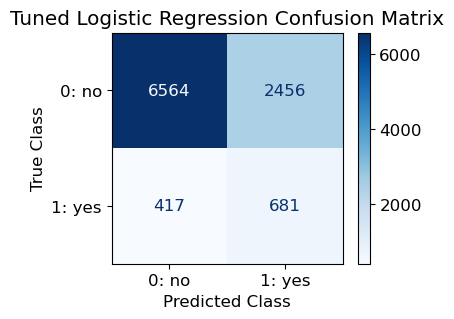

In [56]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, lr2_best.predict(X_test))

#Extract false positives
lr2_FP = conf_matrix[0][1]
#Extract false negatives
lr2_FN = conf_matrix[1][0]

# Set the global font size
plt.rcParams.update({'font.size': 12})

# Plot the confusion matrix using ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(4, 3))  
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0: no', '1: yes']).plot(ax=ax, values_format='d', cmap='Blues')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.grid(False)
plt.show()

##### Questions